__Orignial Datasets__
* Total article  = over 200,000
* With full text = over 100,000
* About          = COVID-19, SARS-CoV2 and related corona virus

__column for clustering__
* title : 341563
* abstract: 243898
* pcm_json_files: 93581

__Due to computational power we use__
* Total article = approax. 10560 samples

__Data Source__
* Prepared by Allen Institute for AI
* url: https://www.semanticscholar.org/cord19/download

In [37]:
import pandas as pd
import json
import csv
import os
from os import path
import time
from IPython.display import clear_output
import datetime
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
from tqdm import tqdm
import scispacy
import en_core_sci_lg
tqdm.pandas()
import string
import seaborn as sn
import matplotlib.pyplot as plt
from spacy_langdetect import LanguageDetector

__Read metadata__
* ___metadata.csv___ : contains information about data
* ___dataframe___ : read csv to dataframe

In [3]:
#read csv file
dataframe = pd.read_csv('../../datasets/metadata.csv', low_memory=False)

__Metadata information__

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341713 entries, 0 to 341712
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          341713 non-null  object 
 1   sha               121365 non-null  object 
 2   source_x          341713 non-null  object 
 3   title             341563 non-null  object 
 4   doi               204180 non-null  object 
 5   pmcid             127340 non-null  object 
 6   pubmed_id         179342 non-null  object 
 7   license           341713 non-null  object 
 8   abstract          243898 non-null  object 
 9   publish_time      341370 non-null  object 
 10  authors           330566 non-null  object 
 11  journal           320729 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  121970 non-null  object 
 14  arxiv_id          4447 non-null    object 
 15  pdf_json_files    121365 non-null  object 
 16  pmc_json_files    93

In [5]:
dataframe.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


__Drop the rows that are null corresponding to columns given below__
* ___title___
* ___abstract___
* ___pmc_json_files___

__The not null data can be used for clustering__
* ___cluster_data___: contains not null dataframe with respect to above given columns

In [7]:
cluster_data = dataframe.dropna(subset=['title','abstract','pmc_json_files'])

__Metadata information__

In [8]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75313 entries, 0 to 341712
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          75313 non-null  object 
 1   sha               73203 non-null  object 
 2   source_x          75313 non-null  object 
 3   title             75313 non-null  object 
 4   doi               75075 non-null  object 
 5   pmcid             75313 non-null  object 
 6   pubmed_id         65748 non-null  object 
 7   license           75313 non-null  object 
 8   abstract          75313 non-null  object 
 9   publish_time      75313 non-null  object 
 10  authors           75147 non-null  object 
 11  journal           74834 non-null  object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      object 
 14  arxiv_id          181 non-null    object 
 15  pdf_json_files    73203 non-null  object 
 16  pmc_json_files    75313 non-null  objec

__Get full literature__
* Meatadata contains information about datasets
* Need to grab full literature from the json files
* ___pmc_json_files___ : contains file name of the full literature provided in json file format.

__Get the important columns from the meatadata__
* only keep the important columns from metadata

__Export the dataframe to new csv file__
* ___covid19_data.csv___ : export new dataframe with full literature to the csv file
* ___full_literature___ : column contains full literature

In [9]:

total_time = 0
count=0
for index, c_data in cluster_data.iterrows():
    data_to_write = pd.DataFrame()
    all_text = ""
    start = time.time()
    print(c_data['pmc_json_files'])
    file_path = '../../datasets/'+c_data['pmc_json_files']
    json_file = open(file_path)
    json_data = json.load(json_file)
    for i in json_data['body_text']:
        all_text = all_text + i['text']
        
    data_to_write = pd.DataFrame({"cord_uid":c_data['cord_uid'],
                                  "sha": c_data['sha'],
                                  "title" : c_data['title'],
                                  "doi":c_data['doi'],
                                  "pmcid":c_data['pmcid'],
                                  "pubmed_id":c_data['pubmed_id'],
                                  "abstract":c_data['abstract'],
                                  "publish_time":c_data['publish_time'],
                                  "authors":c_data['authors'],
                                  "journal":c_data['journal'],
                                  "pmc_json_files":c_data['pmc_json_files'],
                                  "url":c_data['url'],
                                  "full_literature":[all_text]})
    
    if not os.path.isfile('covid19_data.csv'):
       data_to_write.to_csv('covid19_data.csv', header='column_names', index=False)
    else:
       data_to_write.to_csv('covid19_data.csv', mode='a', header=False, index=False)    
    
    stop = time.time()
    duration = stop-start
    total_time = total_time + duration
    time_taken = str(datetime.timedelta(seconds=total_time))
    count=count+1
    clear_output(wait=True)
    print("No.:",count)
    print("Working on file :",file_path)
    print("Time taken/file :",duration)
    print("Total duration :",time_taken)

No.: 75313
Working on file : ../../datasets/document_parses/pmc_json/PMC7447529.xml.json
Time taken/file : 0.004443168640136719
Total duration : 0:07:48.033472


__Read the newly created csv file for pre processing__

In [2]:
covid = pd.read_csv('covid19_data.csv', low_memory=False)

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75313 entries, 0 to 75312
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cord_uid         75313 non-null  object
 1   sha              73203 non-null  object
 2   title            75313 non-null  object
 3   doi              75075 non-null  object
 4   pmcid            75313 non-null  object
 5   pubmed_id        65748 non-null  object
 6   abstract         75313 non-null  object
 7   publish_time     75313 non-null  object
 8   authors          75147 non-null  object
 9   journal          74834 non-null  object
 10  pmc_json_files   75313 non-null  object
 11  url              75313 non-null  object
 12  full_literature  75313 non-null  object
dtypes: object(13)
memory usage: 7.5+ MB


In [4]:
covid.head()

,cord_uid,sha,title,doi,pmcid,pubmed_id,abstract,publish_time,authors,journal,pmc_json_files,url,full_literature
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Mycoplasma pneumoniae is a common cause of upp...
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Since its discovery as a biological messenger ...
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Surfactant protein-D (SP-D) is a member of the...
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"ET-1, ET-2, and ET-3 are members of a peptide ..."
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,RSV and PVM are viruses of the family Paramyxo...


__Feature engineering + pre processing__

* ___text___: Column contains combination of  __title__, __abstract__, __full_literature__
* convert text to lower case
* Remove punctuations and all non alphabetic characters
* Reduce multi space to single space

In [5]:
def clean_data(df):
    total_time = 0
    start = time.time()
    
    covid19 = pd.DataFrame()
    #combine title, abstract and full_literature to text column
    covid19['text'] = df['title'] +" "+ df['abstract'] +" "+ df['full_literature']
    
    #convert text to lower case
    covid19['text']  = covid19['text'].str.lower()
    
    #remove punctuations
    #remove all non alphabetic characters
    regex_1 = re.compile(r'[^a-zA-Z]')
    covid19['text'] = pd.Series(covid19['text']).str.replace(regex_1, ' ')
    
    #reduce multi-space to single space
    regex_2 = re.compile(r' +')
    covid19['text'] = pd.Series(covid19['text']).str.replace(regex_2,' ')
   
    stop = time.time()
    duration = stop-start
    total_time = total_time + duration
    time_taken = str(datetime.timedelta(seconds=total_time))    
    print("Time taken/file :",duration)
    print("Total duration :",time_taken)
    
    return covid19

__Clean the data__

In [6]:
covid19 = pd.DataFrame()
covid19 = clean_data(covid)

Time taken/file : 228.189551115036
Total duration : 0:03:48.189551


In [7]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75313 entries, 0 to 75312
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    75313 non-null  object
dtypes: object(1)
memory usage: 588.5+ KB


In [8]:
covid19.head()

,text
0,clinical features of culture proven mycoplasma...
1,nitric oxide a pro inflammatory mediator in lu...
2,surfactant protein d and pulmonary host defens...
3,role of endothelin in lung disease endothelin ...
4,gene expression in epithelial cells in respons...


__Tokenization__

In [9]:
#stopwords

stopwords = list(STOP_WORDS)

In [10]:
len(stopwords)

326

In [2]:
#get punctuations
punctuations = string.punctuation

In [11]:
nlp = spacy.load('en_core_sci_lg')

/Users/uni/opt/anaconda3/lib/python3.8/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_sci_lg' (0.2.4) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.4). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


__Tokenize and remove stop wrods, punctuations, remove pronoun, convert text into lower case and combine into sentense__

In [51]:
def tokenizer(text):
    tokens = nlp(text)
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stopwords and word not in punctuations ]
    s = " "
    tokens = s.join(tokens)
    return tokens

__RUN tokenizer function__

In [63]:
tqdm.pandas()
covid19['text'] = covid19["text"].progress_apply(tokenizer)

100%|██████████| 75313/75313 [10:17:02<00:00,  2.03it/s]  


__Count the number of words in each documents__

In [64]:
covid19['word_count'] = covid19['text'].apply(lambda x: len(x.strip().split()))

__Export the data to new file__

In [65]:
covid19.to_csv('75313_processed_data.csv', index=False)

__Open the new pre processed file__

In [2]:
covid19 = pd.read_csv('75313_processed_data.csv', low_memory=False)

In [3]:
covid19.head()

,text,word_count
0,clinical feature culture prove mycoplasma pneu...,1191
1,nitric oxide pro inflammatory mediator lung di...,1662
2,surfactant protein d pulmonary host defense su...,3903
3,role endothelin lung disease endothelin et ami...,2981
4,gene expression epithelial cell response pneum...,2091


In [4]:
covid19['word_count'].describe()

count    75313.000000
mean      2432.307902
std       1891.897290
min         10.000000
25%       1372.000000
50%       2045.000000
75%       3008.000000
max      40454.000000
Name: word_count, dtype: float64

__Visualize word count__

/Users/uni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count', ylabel='Density'>

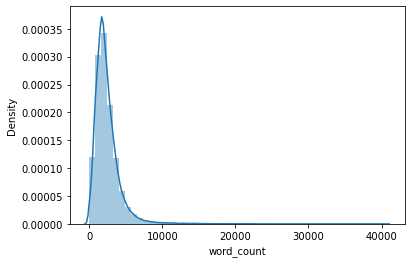

In [5]:
sn.distplot(covid19['word_count'])

__count unique words__

In [6]:
covid19['unique_words_count']=covid19['text'].apply(lambda x:len(set(str(x).split())))

In [7]:
covid19.head()

,text,word_count,unique_words_count
0,clinical feature culture prove mycoplasma pneu...,1191,477
1,nitric oxide pro inflammatory mediator lung di...,1662,649
2,surfactant protein d pulmonary host defense su...,3903,1060
3,role endothelin lung disease endothelin et ami...,2981,812
4,gene expression epithelial cell response pneum...,2091,712


In [8]:
covid19['unique_words_count'].describe()

count    75313.000000
mean       717.895383
std        362.308083
min         10.000000
25%        495.000000
50%        659.000000
75%        874.000000
max       7951.000000
Name: unique_words_count, dtype: float64

__Visualize unique word count__

/Users/uni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='unique_words_count', ylabel='Density'>

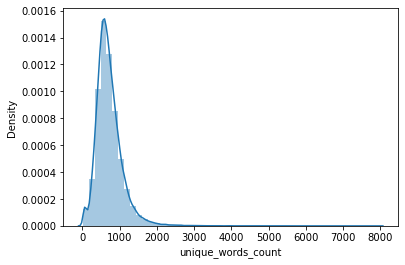

In [9]:
sn.distplot(covid19['unique_words_count'])

# Final data to Work on the Project
* Data limited to around 10000 samples
* Due to limited computational power

__Get the articles having word count min. 3000 and max. 10000.__

In [10]:
work_data = covid19[(covid19['word_count']>3000) & (covid19['word_count']<10000) & (covid19['unique_words_count']>1000)]

__Data only with english language__

In [38]:
nlp = spacy.load('en')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
text = work_data['text']
lang = []
for txt in text:
    docs = nlp(txt)
    if(docs._.languages):
        lang.append(docs._.languages[0])
    else:
        lang.append('unknown')

In [44]:
len(lang)

10560

In [45]:
work_data['lang'] = lang

<ipython-input-45-58585cf6a5e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data['lang'] = lang


In [53]:
len(work_data[work_data['lang']=='en'])

10126

In [56]:
work_data['lang'].unique()

array(['en', 'de', 'nl', 'es', 'pl', 'fr', 'pt'], dtype=object)

In [57]:
work_data['lang'].value_counts()

en    10126
de      251
fr       79
es       68
nl       33
pl        2
pt        1
Name: lang, dtype: int64

__Different language Distribution in bar chart__

<AxesSubplot:>

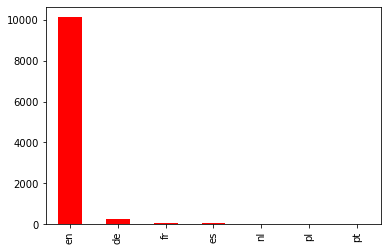

In [62]:
work_data['lang'].value_counts().plot.bar(x='Language', y='count', color='red')

__Get data with english language only__

In [67]:
work_data = work_data[work_data['lang']=='en']

In [68]:
work_data.describe()

,word_count,unique_words_count
count,10126.000000,10126.000000
mean,4620.628086,1281.674896
std,1320.257168,268.374557
min,3001.000000,1001.000000
25%,3656.250000,1090.000000
50%,4265.000000,1199.000000
75%,5197.750000,1390.000000
max,9972.000000,3250.000000


/Users/uni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='unique_words_count', ylabel='Density'>

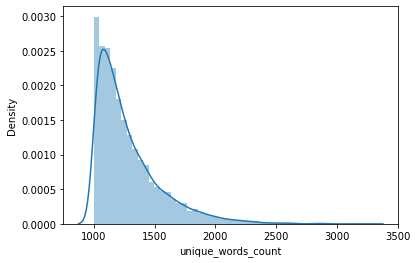

In [69]:
sn.distplot(work_data['unique_words_count'])

/Users/uni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count', ylabel='Density'>

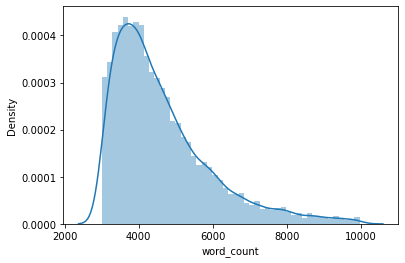

In [70]:
sn.distplot(work_data['word_count'])

__Export the work_data__
* this data will be used for clustering

In [71]:
work_data.to_csv('work_data.csv', index=False)

__Export metadata information from covid19_data.csv file for the corresponding work_data__

In [72]:
#open metadata file
work_metadata = pd.read_csv('covid19_data.csv', low_memory=False)

In [74]:
work_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75313 entries, 0 to 75312
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cord_uid         75313 non-null  object
 1   sha              73203 non-null  object
 2   title            75313 non-null  object
 3   doi              75075 non-null  object
 4   pmcid            75313 non-null  object
 5   pubmed_id        65748 non-null  object
 6   abstract         75313 non-null  object
 7   publish_time     75313 non-null  object
 8   authors          75147 non-null  object
 9   journal          74834 non-null  object
 10  pmc_json_files   75313 non-null  object
 11  url              75313 non-null  object
 12  full_literature  75313 non-null  object
dtypes: object(13)
memory usage: 7.5+ MB


__Get only those index that are both in work_data and work_metadata dataframe__

In [75]:
index = work_metadata.index.isin(work_data.index)

In [76]:
work_metadata = work_metadata[index]

In [77]:
work_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 2 to 75305
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cord_uid         10126 non-null  object
 1   sha              9981 non-null   object
 2   title            10126 non-null  object
 3   doi              10109 non-null  object
 4   pmcid            10126 non-null  object
 5   pubmed_id        8032 non-null   object
 6   abstract         10126 non-null  object
 7   publish_time     10126 non-null  object
 8   authors          10112 non-null  object
 9   journal          10018 non-null  object
 10  pmc_json_files   10126 non-null  object
 11  url              10126 non-null  object
 12  full_literature  10126 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


In [78]:
work_metadata.head()

,cord_uid,sha,title,doi,pmcid,pubmed_id,abstract,publish_time,authors,journal,pmc_json_files,url,full_literature
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Surfactant protein-D (SP-D) is a member of the...
8,8qnrcgnk,faaf1022ccfe93b032c5608097a53543ba24aedb,Heme oxygenase-1 and carbon monoxide in pulmon...,10.1186/1465-9921-4-7,PMC193681,12964953,"Heme oxygenase-1 (HO-1), an inducible stress p...",2003-08-07,"Slebos, Dirk-Jan; Ryter, Stefan W; Choi, Augus...",Respir Res,document_parses/pmc_json/PMC193681.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,The heme oxygenase-1/carbon monoxide (HO-1/CO)...
50,d3cko4j2,40500cd7ae5b4e116e8b13e5408e7dfd96d43ab4,From Functional Genomics to Functional Immunom...,10.1371/journal.pcbi.0020081,PMC1523295,16863395,The development of DNA microarray technology a...,2006-07-28,"Braga-Neto, Ulisses M; Marques, Ernesto T. A",PLoS Comput Biol,document_parses/pmc_json/PMC1523295.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Functional genomics was made possible by the s...
55,j3p1u80n,4c84dbfd01f7b2009ebed54376da8afcbcf1ec64,Model-Based Design of Growth-Attenuated Viruses,10.1371/journal.pcbi.0020116,PMC1557587,16948530,Live-virus vaccines activate both humoral and ...,2006-09-01,"Lim, Kwang-il; Lang, Tobias; Lam, Vy; Yin, John",PLoS Comput Biol,document_parses/pmc_json/PMC1557587.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Infections caused by viruses persistently thre...
59,pk7pnmlo,61d9a0fe39f4e845c44a06787de6f5f033b998a3,An object simulation model for modeling hypoth...,10.1186/1742-4682-3-32,PMC1570461,16928271,"BACKGROUND: EpiFlex is a flexible, easy to use...",2006-08-23,"Hanley, Brian",Theor Biol Med Model,document_parses/pmc_json/PMC1570461.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,This work is related to several threads within...


__Export metadata to work_metadata.csv for the corresponding work_data.csv file__

In [79]:
work_metadata.to_csv('work_metadata.csv', index=False)

# Finally we have two workable csv files
* One : work_data.csv : contains full literature for clustering
* Two : work_metadata.csv : contains metadata for the full literature